i. Introduction and Dataset Description
Introduction:
The Bengaluru real estate market is one of the fastest-growing in India, with significant interest from both domestic and international investors. This case study aims to analyze a dataset containing various features of properties in Bengaluru to understand the factors affecting house prices, identify trends, and provide actionable insights for stakeholders.

ii. Data Loading and Initial Exploration

In [1]:
import pandas as pd
df = pd.read_csv('Bengaluru_House_Data.csv')
print(df.head())
print(df.info())
print(df.describe())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   a

iii. Data Cleaning and Preprocessing

In [2]:
print(df.isnull().sum())
df = df.drop(columns=['society'])  # Drop the 'society' column due to many missing values
df = df.dropna()  # Drop rows with missing values in other columns
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            return (float(x.split('-')[0]) + float(x.split('-')[1])) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna(subset=['total_sqft'])  # Drop rows where 'total_sqft' couldn't be converted
df = df.drop_duplicates()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['total_sqft', 'bath', 'balcony', 'price']] = scaler.fit_transform(df[['total_sqft', 'bath', 'balcony', 'price']])


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


iv. Data Analysis and Operations

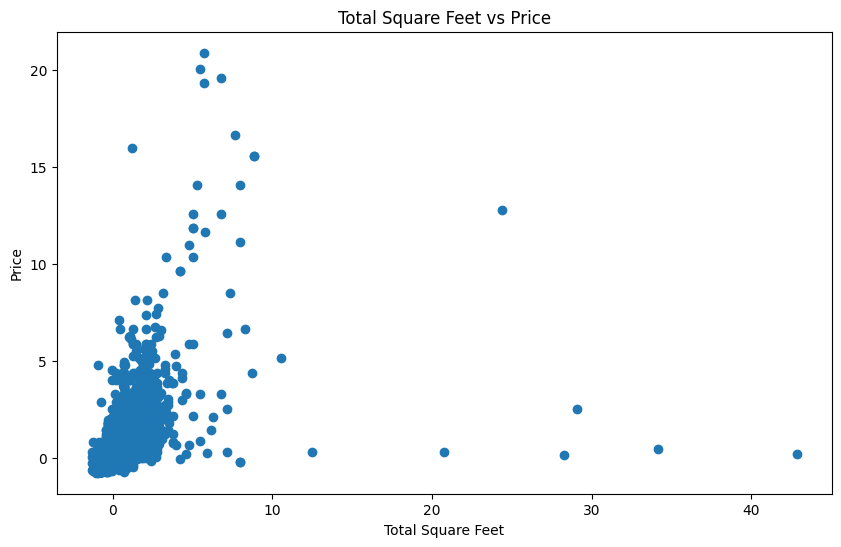

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['total_sqft'], df['price'])
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('Total Square Feet vs Price')
plt.show()

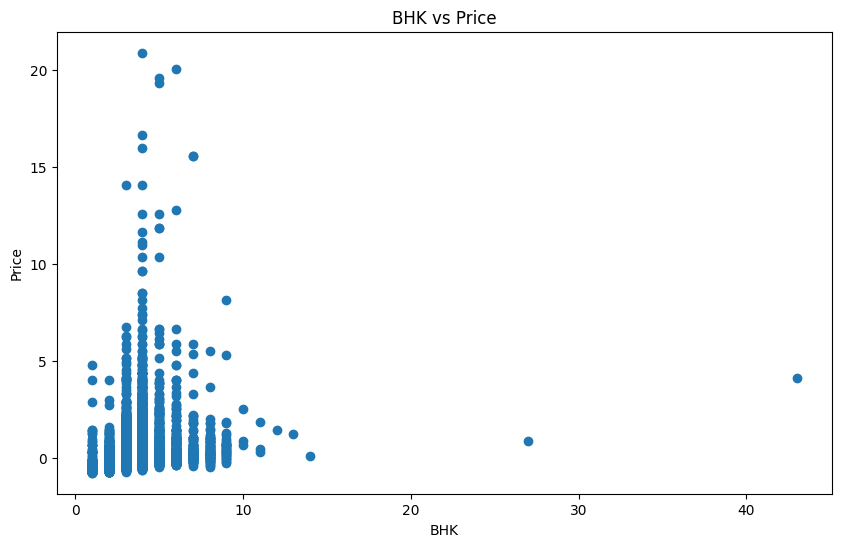

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['bhk'], df['price'])
plt.xlabel('BHK')
plt.ylabel('Price')
plt.title('BHK vs Price')
plt.show()

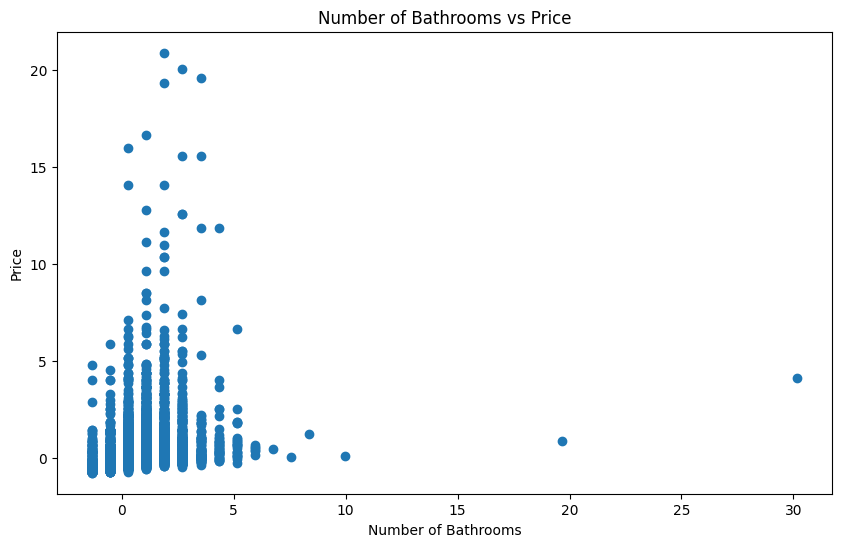

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['bath'], df['price'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Number of Bathrooms vs Price')
plt.show()

v. Generating Insights and Reporting

Correlation Analysis: The correlation matrix shows that total_sqft has the highest positive correlation with price, followed by the number of bathrooms (bath) and number of bedrooms (bhk).
Total Square Feet vs Price: The scatter plot indicates a strong positive relationship between the total area of the property and its price, suggesting that larger properties tend to be more expensive.
BHK vs Price: The number of bedrooms also shows a positive relationship with price, though with more variability compared to total area.
Number of Bathrooms vs Price: Similar to the number of bedrooms, more bathrooms generally correlate with higher property prices.

Conclusion:
Analyzing the Bengaluru House Price dataset using Numpy and Pandas provides valuable insights into the factors affecting property prices. Understanding these factors can aid in making informed decisions in the real estate market, whether it be for buying, selling, or investing in properties.